<a href="https://colab.research.google.com/github/yukta2106/ML-ANN-Experiments/blob/main/ML_Exp_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded: 150 samples, 4 features.
Training set size: 105 samples.
Test set size: 45 samples.

CART Classification Model Trained successfully.
Model Accuracy on Test Set: 88.89%

--- Decision Tree Visualization ---
Decision Rules Learned by CART:

|--- petal length (cm) <= 2.45
|   |--- class: setosa
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.55
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.55
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- sepal width (cm) <= 2.85
|   |   |   |   |--- class: versicolor
|   |   |   |--- sepal width (cm) >  2.85
|   |   |   |   |--- class: virginica
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal length (cm) >  4.85
|   |   |   |   |--- class: virginica



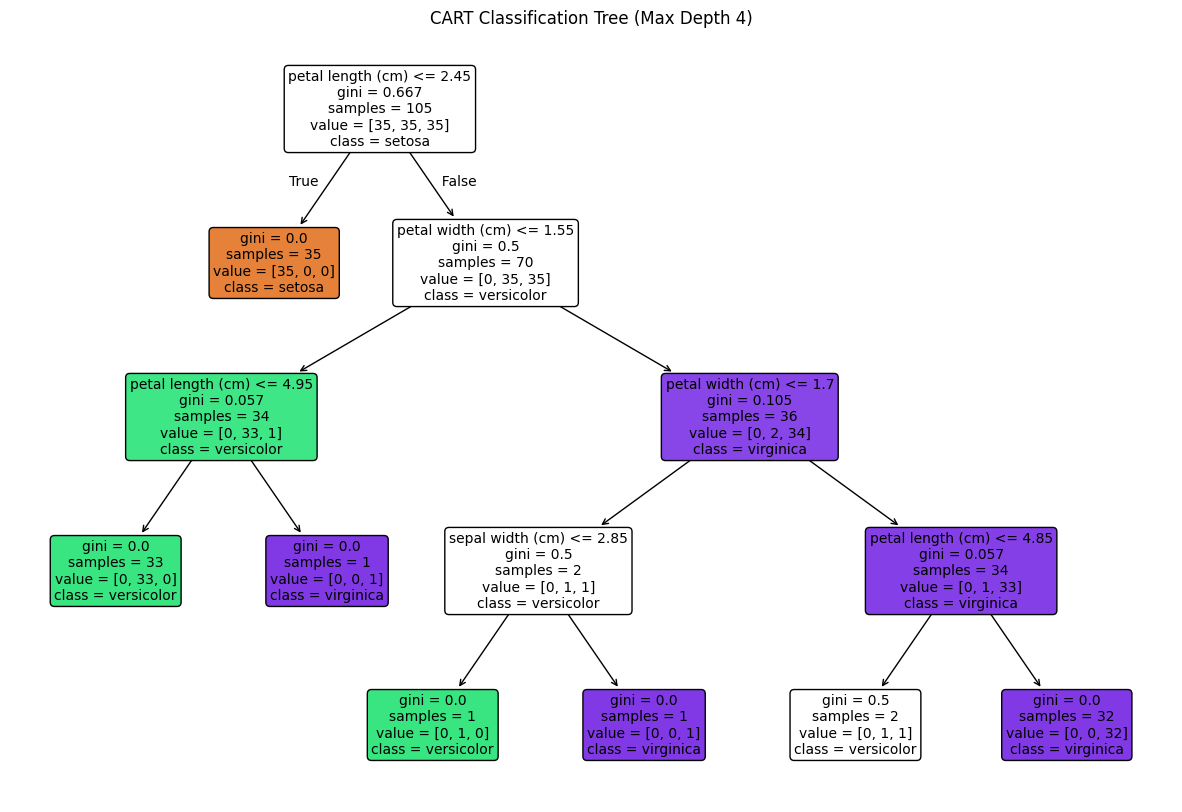

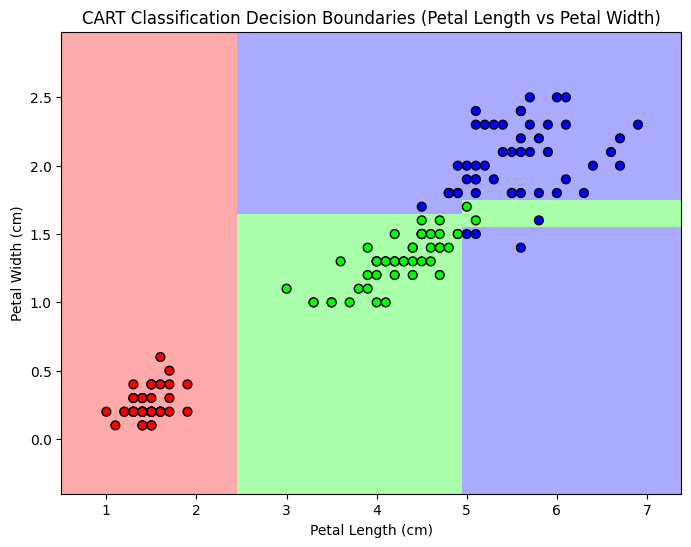

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# --- 1. Setup and Data Preparation ---

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Training set size: {X_train.shape[0]} samples.")
print(f"Test set size: {X_test.shape[0]} samples.")

# --- 2. Model Training (CART Classification) ---

# Initialize the CART classifier (Decision Tree)
# We set a max_depth for better interpretability and to prevent overfitting
cart_classifier = DecisionTreeClassifier(
    criterion='gini', # CART typically uses Gini impurity
    max_depth=4,
    random_state=42
)

# Train the model
cart_classifier.fit(X_train, y_train)

print("\nCART Classification Model Trained successfully.")

# --- 3. Prediction and Evaluation ---

# Make predictions on the test set
y_pred = cart_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")

# --- 4. Visualization ---

print("\n--- Decision Tree Visualization ---")

# A. Text Representation (Rules)
tree_rules = export_text(cart_classifier, feature_names=feature_names, class_names=target_names)
print("Decision Rules Learned by CART:\n")
print(tree_rules)

# B. Graphical Visualization of the Tree
plt.figure(figsize=(15, 10))
plot_tree(cart_classifier,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("CART Classification Tree (Max Depth 4)")
plt.show()

# C. Visualization of Decision Boundaries (Focus on 2 features for plotting)

# Select the two most important features (petal length and petal width are usually the best)
# Indices 2 and 3 correspond to 'petal length (cm)' and 'petal width (cm)'
X_2d = X[:, [2, 3]]
y_2d = y

# Re-train the model only on the 2 features for visualization clarity
cart_2d = DecisionTreeClassifier(max_depth=4, random_state=42)
cart_2d.fit(X_2d, y_2d)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for every point in the mesh
Z = cart_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training points
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=cmap_bold,
            edgecolor='k', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("CART Classification Decision Boundaries (Petal Length vs Petal Width)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()